<a href="https://colab.research.google.com/github/dtee1/ELG5255-Applied-Machine-Learning/blob/main/Assignment_1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import svm, datasets
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import warnings

In [2]:
# Load the DUMD test and train dataset 
def loadDataset(): 
  dumd_test = pd.read_csv("DUMD_test.csv")
  dumd_train = pd.read_csv("DUMD_train.csv")
  return dumd_test, dumd_train

In [3]:
# This function prepares the train and test dataset
# Function input features specifies the features from the dataset to be returned 
# Categorical encoding is performed on the 'UNS' column using the following relation: 0 = high, 1 = medium, 2 = low, 3 = very low

# Todo: Add input validation for features 
def produceDataset(features):

  data_test, data_train = loadDataset()
  labelEncoder = LabelEncoder()
  data_train['UNS_N'] = labelEncoder.fit_transform(data_train['UNS'])
  data_test['UNS_N'] = labelEncoder.fit_transform(data_test['UNS'])
  X_test = data_test[features]
  X_train = data_train[features]
  y_test = data_test.UNS_N
  y_train = data_train.UNS_N

  return X_train, X_test, y_train, y_test, data_train

In [4]:
# Plot the dataset using input features supplied to the function 
def plotData(data, feat_i, feat_j):
  
  plt.scatter(data[feat_i][data.UNS_N == 0], data[feat_j][data.UNS_N == 0], c='r', marker='o', label='High')
  plt.scatter(data[feat_i][data.UNS_N == 1], data[feat_j][data.UNS_N == 1], c='b', marker='*', label='Medium')
  plt.scatter(data[feat_i][data.UNS_N == 2], data[feat_j][data.UNS_N == 2], c='g', marker='+', label='Low')
  plt.scatter(data[feat_i][data.UNS_N == 3], data[feat_j][data.UNS_N == 3], c='y', marker='d', label='Very low')
  
  Title = "DUMD Dataset with 4 classes"
  plt.title(Title)
  plt.xlabel('LPR')
  plt.ylabel('PEG')
  plt.legend(bbox_to_anchor =(1.25, 1))

In [5]:
def plotRegions(model, X):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  z = model.predict(np.c_[XX.ravel(), YY.ravel()])
  ZZ = z.reshape(XX.shape)
  plt.contourf(XX, YY, ZZ, alpha=0.2)

In [6]:
def getAccuracy(model, x, y):
    return model.score(x,y)*100

In [7]:
# this function can be used to plot the decision boundary Copied from prof
def plotDecisionBoundary( X, y, model, title=''):
    plt.close('all')
    plt.figure()
    cm = plt.cm.Set1
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cm,
        edgecolors='k',
        alpha=1,
    )
    plt.title(title)

Accuracy of model_svg: 96.28%

Confusion Matrix using SVM:

[[21  0  0  0]
 [ 0 26  0  0]
 [ 0  0 22  0]
 [ 0  0  0 11]]


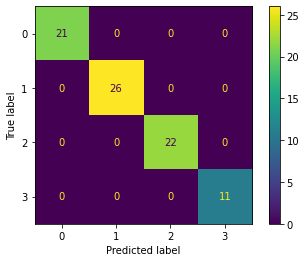

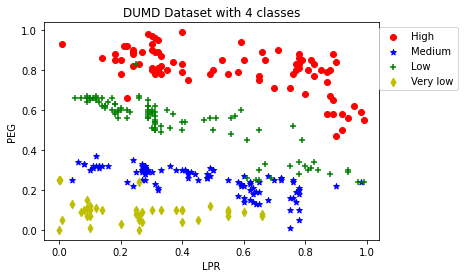

In [9]:
def main():

  features = ['LPR','PEG']
  categories = [0,1,2,3]
  X_train, X_test, y_train, y_test, data_train = produceDataset(features)

  model_svg = svm.SVC(kernel='linear', decision_function_shape='ovo', C=100)
  model_svg.fit(X_train, y_train)

  y_true_svg, y_pred_svg = y_test, model_svg.predict(X_test)

  print('Accuracy of model_svg: {:.2f}%'.format(getAccuracy(model_svg, X_train, y_train)))

  print('\nConfusion Matrix using SVM:\n')
  print(confusion_matrix(y_test, y_pred_svg))
  ConfusionMatrixDisplay.from_estimator(model_svg, X_test, y_pred_svg)
  plt.show()
  X_numpy = np.array(X_train)
  y_numpy = np.array(y_train)


  plotData(data_train, features[0], features[1])
  #plot_decision_regions(X_numpy, y_numpy, model_svg)

if __name__ == '__main__':
    main()

Accuracy of model_svg: 73.75%

Confusion Matrix using Perceptron:

[[21  0  0  0]
 [ 0 15  3  8]
 [ 4  6 12  0]
 [ 0  0  0 11]]


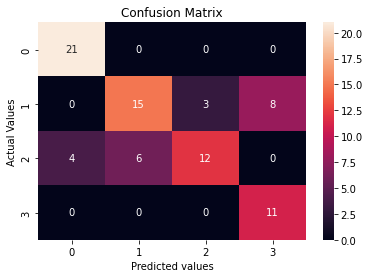

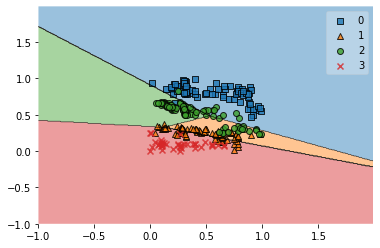

In [12]:
def main():
  warnings.simplefilter('ignore')
  features = ['LPR','PEG']
  categories = [0,1,2,3]
  X_train, X_test, y_train, y_test, data_train = produceDataset(features)

  # Using Perceptron 
  model_percep = Perceptron(random_state=1)
  model_percep.fit(X_train, y_train)

  y_true_percep, y_pred_percep = y_test, model_percep.predict(X_test)
  print('Accuracy of model_svg: {:.2f}%'.format(getAccuracy(model_percep, X_test, y_test)))

  conf = confusion_matrix(y_test, y_pred_percep)
  print('\nConfusion Matrix using Perceptron:\n')
  print(conf)
  sns.heatmap(conf, annot=True)
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted values')
  plt.ylabel('Actual Values')
  plt.show()
  X_numpy = np.array(X_train)
  y_numpy = np.array(y_train)

  plot_decision_regions(X_numpy, y_numpy, model_percep)

if __name__ == '__main__':
    main()

Question **2** 

In [ ]:
def main():
  warnings.simplefilter('ignore')
  features = ['LPR','PEG']
  categories = [0,1,2,3]
  X_train, X_test, y_train, y_test, data_train = produceDataset(features)
  
  X_train = np.array(X_train)
  X_test = np.array(X_test)
  
  y_test = np.array(y_test)
  y_test = y_test.reshape((-1,1))
  
  y_train = np.array(y_train)
  y_train = y_train.reshape((-1,1))


  mlb = MultiLabelBinarizer()
  yNew = mlb.fit_transform(y_train)

  y0 = yNew[:,0]
  y1 = yNew[:,1] 
  y2 = yNew[:,2] 
  y3 = yNew[:,3]

  yNew_test = mlb.fit_transform(y_test)

  y0_test = yNew_test[:,0]
  y1_test = yNew_test[:,1] 
  y2_test = yNew_test[:,2] 
  y3_test = yNew_test[:,3]

  # print("y0\n", y0)
  clf_0 = svm.SVC(kernel='rbf', probability=True)
  clf_0.fit(X_train, y0)
  print('Accuracy of Model: {:.2f}%'.format(getAccuracy(clf_0, X_test, y0_test)))
  yb0_pred = clf_0.predict_proba(X_test)[:,1].reshape(-1,1)
  
  #Decision Boundary
  plot_decision_regions(X_test, y0_test, clf_0)
  plt.xlabel('LPR')
  plt.ylabel('PEG')
  plt.title('Decision Boundary for Class = High')
  plt.show()

  clf_1 = svm.SVC(kernel='rbf', probability=True)
  clf_1.fit(X_train, y1)
  print('Accuracy of Model: {:.2f}%'.format(getAccuracy(clf_1, X_test, y1_test)))
  yb1_pred = clf_1.predict_proba(X_test)[:,1].reshape(-1,1)

  #Decision Boundary
  plot_decision_regions(X_test, y1_test, clf_1)
  plt.xlabel('LPR')
  plt.ylabel('PEG')
  plt.title('Decision Boundary for Class = Low')
  plt.show()

  clf_2 = svm.SVC(kernel='rbf', probability=True)
  clf_2.fit(X_train, y2)
  print('Accuracy of clf_1: {:.2f}%'.format(getAccuracy(clf_2, X_test, y2_test)))
  yb2_pred = clf_2.predict_proba(X_test)[:,1].reshape(-1,1)
  
  #Decision Boundary
  plot_decision_regions(X_test, y2_test, clf_2)
  plt.xlabel('LPR')
  plt.ylabel('PEG')
  plt.title('Decision Boundary for Class = Medium')
  plt.show()

  clf_3 = svm.SVC(kernel='rbf', probability=True)
  clf_3.fit(X_train, y3)
  print('Accuracy of Model: {:.2f}%'.format(getAccuracy(clf_3, X_test, y3_test)))
  yb3_pred = clf_3.predict_proba(X_test)[:,1].reshape(-1,1)
 
  #Decision Boundary
  plot_decision_regions(X_test, y2_test, clf_3)
  plt.xlabel('LPR')
  plt.ylabel('PEG')
  plt.title('Decision Boundary for Class = Very Low')
  plt.show()

  yb_all = np.hstack((yb0_pred, yb1_pred, yb2_pred, yb3_pred))
  m = mlb.classes_[np.argmax(yb_all, axis=1)]
  m = m.astype(str).astype(int)

  print(classification_report(y_test, m))
  # print(confusion_matrix(svm_test_y, svm_y_predict))

  ax_ovr = plt.subplot()
  # predict_results = model.predict(normed_test_data)

  cm_ovr = confusion_matrix(y_test, m)

  sns.heatmap(cm_ovr, annot=True, ax = ax_ovr); #annot=True to annotate cells

  # labels, title and ticks
  ax_ovr.set_xlabel('Predicted labels');ax_ovr.set_ylabel('True labels'); 
  ax_ovr.set_title('Confusion Matrix');
  plt.show() 

  axis = plot_decision_regions(X_test, m, clf_0, legend=1)
  plot_decision_regions(X_test, m, clf_1, ax = axis, legend=0)
  plot_decision_regions(X_test, m, clf_2, ax = axis, legend=0)
  plot_decision_regions(X_test, m, clf_3, ax = axis, legend=0)
  plt.xlabel('LPR')
  plt.ylabel('PEG')
  plt.title('Aggregate Decision Boundary')
  plt.show()

if __name__ == '__main__':
    main()

# Question 3(a):

In [ ]:
# libraries
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling

In [ ]:
knn_data = pd.read_csv("/content/car_evaluation_new.csv")

knn_data.head()

In [ ]:
feature_df = knn_data[['buying price', 'maintenance cost','number of doors', 'number of persons','lug_boot', 'safety']]

knn_x = np.array(feature_df)
knn_y = np.array(knn_data['class'])

In [ ]:
# We want to split the data in 57.87:17.36:24.77 for train:valid:test dataset
train_size=0.5788

X = knn_data.drop(columns = ['class']).copy()
y = knn_data['class']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.5788)

# Now since we want the valid and test size to be 17.36:24.77. 
# we have to define valid_size=0.4121 (that is 41.21% of remaining data)
test_size = 0.5879
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5879)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

# Question 3(b):

In [ ]:
knn_data.info()

In [ ]:
labelencoder = LabelEncoder()

knn_data['buying price'] = labelencoder.fit_transform(knn_data['buying price'])
knn_data['maintenance cost'] = labelencoder.fit_transform(knn_data['maintenance cost'])
knn_data['number of doors'] = labelencoder.fit_transform(knn_data['number of doors'])
knn_data['lug_boot'] = labelencoder.fit_transform(knn_data['lug_boot'])
knn_data['safety'] = labelencoder.fit_transform(knn_data['safety'])
knn_data['class'] = labelencoder.fit_transform(knn_data['class'])

knn_data.to_csv(r'Car_Evaluation_New.csv', index = False)
knn_data_new = pd.read_csv("/content/Car_Evaluation_data.csv")
knn_data_new.info()

# Question 3(b):

In [ ]:
knn_data.info()

In [ ]:
labelencoder = LabelEncoder()

knn_data['buying price'] = labelencoder.fit_transform(knn_data['buying price'])
knn_data['maintenance cost'] = labelencoder.fit_transform(knn_data['maintenance cost'])
knn_data['number of doors'] = labelencoder.fit_transform(knn_data['number of doors'])
knn_data['lug_boot'] = labelencoder.fit_transform(knn_data['lug_boot'])
knn_data['safety'] = labelencoder.fit_transform(knn_data['safety'])
knn_data['class'] = labelencoder.fit_transform(knn_data['class'])

knn_data.to_csv(r'Car_Evaluation_New.csv', index = False)
knn_data_new = pd.read_csv("/content/Car_Evaluation_data.csv")
knn_data_new.info()

# Question 3(c):

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [ ]:
knn_data_new = pd.read_csv("/content/Car_Evaluation_data.csv")
knn_data_new.info()

In [ ]:
feature_df_new = knn_data_new[['buying price', 'maintenance cost','number of doors', 'number of persons','lug_boot', 'safety']]

knn_x_new = np.array(feature_df_new)
knn_y_new = np.array(knn_data_new['class'])

In [ ]:
# We want to split the data in 57.87:17.36:24.77 for train:valid:test dataset
train_size=0.5788

X_new = knn_data_new.drop(columns = ['class']).copy()
y_new = knn_data_new['class']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X_new,y_new, train_size=0.5788)

# Now since we want the valid and test size to be 17.36:24.77. 
# we have to define valid_size=0.4121 (that is 41.21% of remaining data)
test_size = 0.5879
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5879)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

In [ ]:
samples = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
mean_acc_valid = np.zeros((10))
std_acc_valid = np.zeros((10))
mean_acc_test = np.zeros((10))
std_acc_test = np.zeros((10))
ConfustionMx = [];
for n in range(0,len(samples)):
    
    #Train Model and Predict  
    x = X_train
    y = y_train
    X_train_loop, X_rem, y_train_loop, y_rem = train_test_split(x,y, train_size=samples[n])
    neigh = KNeighborsClassifier(n_neighbors = 2).fit(X_train_loop,y_train_loop)
    yhat_valid=neigh.predict(X_valid)
    mean_acc_valid[n] = metrics.accuracy_score(y_valid, yhat_valid)
    std_acc_valid[n]=np.std(yhat_valid==y_valid)/np.sqrt(yhat_valid.shape[0])

    yhat_test=neigh.predict(X_test)
    mean_acc_test[n] = metrics.accuracy_score(y_test, yhat_test)
    std_acc_test[n]=np.std(yhat_test==y_test)/np.sqrt(yhat_test.shape[0])

neigh = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
yhat_valid=neigh.predict(X_valid)
mean_acc_valid[9] = metrics.accuracy_score(y_valid, yhat_valid)
std_acc_valid[9]=np.std(yhat_valid==y_valid)/np.sqrt(yhat_valid.shape[0])

yhat_test=neigh.predict(X_test)
mean_acc_test[9] = metrics.accuracy_score(y_test, yhat_test)
std_acc_test[9]=np.std(yhat_test==y_test)/np.sqrt(yhat_test.shape[0])


In [ ]:
plt.plot(range(0,10),mean_acc_test,'b', label = 'Test')
plt.plot(range(0,10),mean_acc_valid,'r', label = 'Valid')
plt.fill_between(range(0,10),mean_acc_test - 1 * std_acc_test,mean_acc_test + 1 * std_acc_test, alpha=0.10)
plt.fill_between(range(0,10),mean_acc_valid - 1 * std_acc_valid,mean_acc_valid + 1 * std_acc_valid, alpha=0.10)
plt.legend()
plt.ylabel('Accuracy ')
plt.xlabel('Number of Samples in Percentage (%)')
plt.title("Varying Portion of Sampling Data")
plt.show()

# Question 3(d):

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_valid)
    mean_acc[n-1] = metrics.accuracy_score(y_valid, yhat)

    
    std_acc[n-1]=np.std(yhat==y_valid)/np.sqrt(yhat.shape[0])

mean_acc

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neignbours (K)')
plt.title("Varying K values")
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)